![Drag Racing](logo.png)

# `vaex` @ PyData Global 2022

# Vaex: the perfect DataFrame library for Python data apps

About the data used in this demo: [The GDELT project](https://www.gdeltproject.org/).

In [1]:
import vaex

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## Main concepts of `vaex`

- memory mappable storage
- shallow copies
- expression system:
  - delayed (a.k.a lazy) evaluations
  - efficient algorithms
- emphasis on aggregate data properties instead of individual sampels

### Memory mappage storage (read in the data)

In [2]:
# Check the file size on disk
!du -h /data/jovan/data/gdelt/Events/Events.hdf5

347G	/data/jovan/data/gdelt/Events/Events.hdf5


In [5]:
# Open the data in HDF5 format
df = vaex.open('/data/jovan/data/gdelt/Events/Events.hdf5')

print(f'Number of rows:    {df.shape[0]:,}')
print(f'Number of columns: {df.shape[1]:,}')

Number of rows:    626,002,275
Number of columns: 61


In [8]:
# Basic view of the contents
df

#,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1037356467,20220401,202204,2022,2022.2493,COPGOV,POLICE,--,--,--,--,--,COP,GOV,--,MEX,OAXACA,MEX,--,--,--,--,--,--,--,1,173,173,17,4,-5.0,10,1,10,-4.50450450450451,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,20220402133000,'https://imparcialoaxaca.mx/policiaca/640606/cae...
1,1037356550,20220402,202204,2022,2022.2521,BUS,COMPANY,--,--,--,--,--,BUS,--,--,--,--,--,--,--,--,--,--,--,--,1,141,141,14,3,-6.5,10,1,10,-2.71028037383177,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,20220402133000,'https://www.lavozdegalicia.es/noticia/coruna/20...
2,1037356555,20220402,202204,2022,2022.2521,BUS,COMPANIES,--,--,--,--,--,BUS,--,--,GOV,GOVERNMENT,--,--,--,--,--,GOV,--,--,1,070,070,07,2,7.0,10,1,10,0.0,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,20220402133000,'https://www.sudinfo.be/id454049/article/2022-04...
3,1037356557,20220402,202204,2022,2022.2521,BUS,TRADER,--,--,--,--,--,BUS,--,--,MEX,MEXICAN,MEX,--,--,--,--,--,--,--,1,060,060,06,2,6.0,10,1,10,-3.44827586206897,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,20220402133000,'https://imparcialoaxaca.mx/policiaca/640608/mot...
4,1037356558,20220402,202204,2022,2022.2521,BUS,TRADER,--,--,--,--,--,BUS,--,--,NGOHLHIRC,ICRC,--,IRC,--,--,--,NGO,HLH,--,1,020,020,02,1,3.0,10,1,10,-3.44827586206897,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,0,--,--,--,--,nan,nan,--,20220402133000,'https://imparcialoaxaca.mx/policiaca/640608/mot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"626,002,270",1037360336,20220402,202204,2022,2022.2521,SAU,SAUDI ARABIA,SAU,--,--,--,--,--,--,--,EGY,EGYPT,EGY,--,--,--,--,--,--,--,1,051,051,05,1,3.4,2,1,2,0.57142857142858,1,Saudi Arabia,SA,SA,--,25.0,45.0,SA,4,"Arab League, Al Qahirah, Egypt",EG,EG11,65350,30.0445,31.2332,11230301,4,"Marib, Ma'rib, Yemen",YM,YM14,145032,15.461,45.3253,10642624,20220402141500,http://bwabtk.com/890131.html
"626,002,271",1037360337,20220402,202204,2022,2022.2521,SAU,SAUDI ARABIA,SAU,--,--,--,--,--,--,--,EGY,EGYPT,EGY,--,--,--,--,--,--,--,0,080,080,08,2,5.0,2,1,2,0.57142857142858,1,Saudi Arabia,SA,SA,--,25.0,45.0,SA,4,"Arab League, Al Qahirah, Egypt",EG,EG11,65350,30.0445,31.2332,11230301,1,Saudi Arabia,SA,SA,--,25.0,45.0,SA,20220402141500,http://bwabtk.com/890131.html
"626,002,272",1037360339,20220402,202204,2022,2022.2521,SAU,SAUDI ARABIA,SAU,--,--,--,--,--,--,--,IGOMEAARL,ARAB LEAGUE,MEA,ARL,--,--,--,IGO,--,--,1,051,051,05,1,3.4,4,1,4,0.57142857142858,1,Saudi Arabia,SA,SA,--,25.0,45.0,SA,4,"Arab League, Al Qahirah, Egypt",EG,EG11,65350,30.0445,31.2332,11230301,4,"Marib, Ma'rib, Yemen",YM,YM14,145032,15.461,45.3253,10642624,20220402141500,http://bwabtk.com/890131.html
"626,002,273",1037360340,20220402,202204,2022,2022.2521,SAU,SAUDI ARABIA,SAU,--,--,--,--,--,--,--,IGOMEAARL,ARAB 

### Shallow copies

In [9]:
useful_columns = ['Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 
                  'Actor2Type1Code', 'Actor2Type3Code', 'Actor2Type3Code',
                  'Year', 'NumSources', 'NumArticles', 'AvgTone', 'GoldsteinScale'
                 ]

df2 = df[useful_columns]
df2

#,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Type1Code,Actor2Type3Code,Year,NumSources,NumArticles,AvgTone,GoldsteinScale
0,COP,GOV,--,--,--,2022,1,10,-4.50450450450451,-5.0
1,BUS,--,--,--,--,2022,1,10,-2.71028037383177,-6.5
2,BUS,--,--,GOV,--,2022,1,10,0.0,7.0
3,BUS,--,--,--,--,2022,1,10,-3.44827586206897,6.0
4,BUS,--,--,NGO,--,2022,1,10,-3.44827586206897,3.0
...,...,...,...,...,...,...,...,...,...,...
"626,002,270",--,--,--,--,--,2022,1,2,0.57142857142858,3.4
"626,002,271",--,--,--,--,--,2022,1,2,0.57142857142858,5.0
"626,002,272",--,--,--,IGO,--,2022,1,4,0.57142857142858,3.4
"626,002,273",--,--,--,IGO,--,2022,1,6,0.57142857142858,5.0


### Interactions with the data: standard DataFrame API

In [10]:
# Lets view a column
df.AvgTone

Expression = AvgTone
Length: 626,002,275 dtype: float64 (column)
-------------------------------------------
        0   -4.5045
        1  -2.71028
        2         0
        3  -3.44828
        4  -3.44828
        ...        
626002270  0.571429
626002271  0.571429
626002272  0.571429
626002273  0.571429
626002274  0.571429

In [11]:
# Lets view another columns
df.Actor1Type1Code

Expression = Actor1Type1Code
Length: 626,002,275 dtype: string (column)
------------------------------------------
        0  COP
        1  BUS
        2  BUS
        3  BUS
        4  BUS
     ...      
626002270   --
626002271   --
626002272   --
626002273   --
626002274   --

### Lazy evaluations

In [12]:
# For any computation, if printed/displayed, only a preview is shown
df.NumArticles / df.NumSources

Expression = (NumArticles / NumSources)
Length: 626,002,275 dtype: float64 (expression)
-----------------------------------------------
        0  10
        1  10
        2  10
        3  10
        4  10
     ...     
626002270   2
626002271   2
626002272   4
626002273   6
626002274   2

### Expressions & Virtual Columns

In [13]:
# Define a virtual column. We call it virtual cause it uses no memory!
# It is evaluated on the fly when needed.
df2['num_articles_per_source'] = df2.NumArticles / df2.NumSources

# Display the DataFrame
df2

#,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Type1Code,Actor2Type3Code,Year,NumSources,NumArticles,AvgTone,GoldsteinScale,num_articles_per_source
0,COP,GOV,--,--,--,2022,1,10,-4.50450450450451,-5.0,10.0
1,BUS,--,--,--,--,2022,1,10,-2.71028037383177,-6.5,10.0
2,BUS,--,--,GOV,--,2022,1,10,0.0,7.0,10.0
3,BUS,--,--,--,--,2022,1,10,-3.44827586206897,6.0,10.0
4,BUS,--,--,NGO,--,2022,1,10,-3.44827586206897,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
"626,002,270",--,--,--,--,--,2022,1,2,0.57142857142858,3.4,2.0
"626,002,271",--,--,--,--,--,2022,1,2,0.57142857142858,5.0,2.0
"626,002,272",--,--,--,IGO,--,2022,1,4,0.57142857142858,3.4,4.0
"626,002,273",--,--,--,IGO,--,2022,1,6,0.57142857142858,5.0,6.0


### Evaluating expressions

In [14]:
# Calculate some statistics
df2.num_articles_per_source.mean(progress='widget')

array(5.46856944)

### Binned statistics
 - 0-dimenional (point values): mean, standard deviation, skew etc..

In [15]:
df2.count(df.AvgTone, progress='widget')

array(626002275)

Vaex calculate multiple statistics with a single pass over the data

In [16]:
df2.mean([df.AvgTone, df.GoldsteinScale], progress='widget')

array([-1.98831662,  0.57507637])

- 1-dimensional: histograms

In [17]:
df2.count(binby=df2.AvgTone, shape=32, progress='widget')

array([        1,         0,         0,         0,         2,         3,
               6,         8,        29,        47,       278,       510,
            2217,     10405,     47070,    301471,   2077769,  13676167,
        67807097, 196812020, 242564437,  89781962,  11648398,   1127030,
          127086,     15796,      1937,       392,        92,        28,
              10,         6])

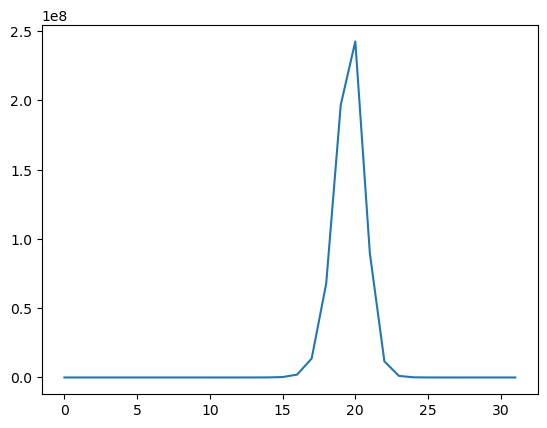

In [18]:
plt.plot(_);

We can generalize this to N-dimensions:
 - 2-dimensional representations: heatmaps
 - higher dimensionalities
 
`vaex-viz` provides convenience methods for computing and displaying histograms, heatmaps and other plots, with a variety of options out of the box:

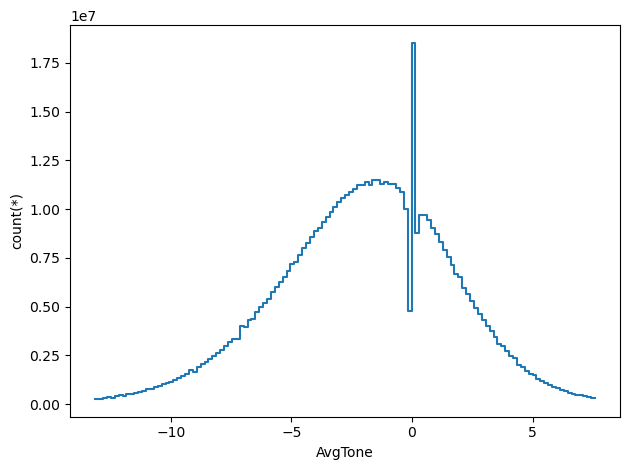

In [19]:
df.AvgTone.viz.histogram(limits='99%', shape=128, progress='widget');

### Efficient aggregations

In [20]:
# Most importand data-science method according to Jovan
df2.Year.value_counts(progress='widget')

2016    114490697
2017    105043785
2018     94274806
2015     88097260
2019     82320409
2020     65355708
2021     58862936
2022     15805440
2014       881993
1920       789562
2006        13552
2007        13064
2005        11819
2008        11784
2009        11181
2010         8507
2011         7670
2012         2102
dtype: int64

In [21]:
# Determining the number of unique elements
df2.Actor1Type1Code.nunique(progress='widget')

34

In [22]:
# GrouBy calculations are super fast - and you can do filtering per aggregation!!
df2.groupby(['Year', 'Actor1Type1Code'], 
            progress='widget',
            agg={
                'AvgTone': ['mean', 'std'],
                'GoldsteinScale_filtered': vaex.agg.mean('GoldsteinScale', selection=df2.NumArticles>2)
                }
           )

#,Year,Actor1Type1Code,AvgTone_mean,AvgTone_std,GoldsteinScale_filtered
0,2010,--,-1.7139761846241774,3.5234826182067334,0.8036969696969698
1,2010,MED,-1.651721928629778,2.9181205779663775,-0.45390070921985815
2,2010,SEP,-0.62305295950155,0.0,2.8
3,2010,ELI,-0.6933948344660995,2.1680634124840346,1.7354838709677418
4,2010,GOV,-1.9660171662131163,3.203318643018034,0.9509842519685041
...,...,...,...,...,...
575,2022,REF,-2.803824163637289,3.005178706159556,2.078164071577916
576,2022,REB,-4.150879566541084,3.49189998876314,-1.9969966783539355
577,2022,COP,-4.97433940063627,3.780470703413424,-1.7178295828329053
578,2022,INS,-3.0582203284692033,2.734568293309767,0.040452725592856245


## Leverage `vaex` and build fast applications!

In [23]:
actor_codes = {
    'AGR': 'Agriculture: individuals and groups involved in the practices of crop cultivation including government agencies whose primary concern is agricultural issues',
    'BUS': 'Business: businessmen, companies, and enterprises, not including MNCs',
    'COP': 'Police forces, officers, criminal investigative units, protective agencies',
    'CRM': 'Criminal: corresponding to individuals involved in or allegedly involved in the deliberate breaking of state or international laws primarily for profit',
    'CVL': 'Civilian individuals or groups sometimes used as catch-all for individuals or groups for whom no other role category is appropriate',
    'DEV': 'Development: individuals or groups concerned primarily with development issues of varying types including infrastructure creation, democratization et al.',
    'EDU': 'Education: educators, schools, students, or organizations dealing with education',
    'ELI': 'Elites: former government officials, celebrities, spokespersons for organizations without further role categorization (George Soros, former Secretary of Defense, Bono)',
    'ENV': 'Environmental: entities for whom environmental and ecological issues are their primary focus, includes wildlife preservation, climate change, etc.',
    'GOV': 'Government: the executive, governing parties, coalitions partners, executive divisions',
    'HLH': 'Health: individuals, groups and organizations dealing with health and social welfare practices (doctors, Doctors Without Borders)',
    'HRI': 'Human Rights: actors for whom their primary area of operation or expertise is with documenting and/or correcting human rights concerns',
    'IGO': 'Inter-governmental organizations',
    'IMG': 'International Militarized Groups',
    'INS': 'Insurgents (rebels): all rebels who attempt to overthrow their national government',
    'INT': 'International or transnational actors who cannot be further specified as IGO, UIS, NGO, NGM, or MNC',
    'JUD': 'Judiciary: judges, courts',
    'LAB': 'Labor: specifically individuals in or elements of organized labor, organizations concerned with labor issues',
    'LEG': 'Legislature: parliaments, assemblies, lawmakers, references to specific legislative entities or sub-entities such as committees',
    'MED': 'Media: journalists, newspapers, television stations also includes providers of internet services and other forms of mass information dissemination',
    'MIL': 'Military: troops, soldiers, all state-military personnel/equipment',
    'MNC': 'Multi-national corporation',
    'MOD': 'Moderate: “moderate,” “mainstream,” etc.',
    'NGM': 'Non-governmental movements',
    'NGO': 'Non-governmental organizations',
    'OPP': 'Political opposition: opposition parties, individuals, anti-government activists',
    'RAD': 'Radical: “radical,” “extremist,” “fundamentalist,” et',
    'REB': 'Rebels: armed and violent opposition groups, individuals',
    'REF': 'Refugees: also refers to agencies or MNCs dealing with population migration and relocation issues',
    'SEP': 'Separatist rebels: all rebels who try to emancipate their region from its country',
    'SPY': 'State intelligence services and members including covert operations groups as well as intelligence collection and analyses',
    'UAF': 'Armed forces aligned neither with nor against their government',
    'UIS': 'Unidentified state actors',
}

In [24]:
def create_filter(codes: list, year_min: int, year_max: int) -> vaex.expression.Expression:
    filter = (df.Actor1Type1Code.isin(codes) |
              df.Actor1Type2Code.isin(codes) |
              df.Actor1Type3Code.isin(codes) |
              df.Actor2Type1Code.isin(codes) |
              df.Actor2Type2Code.isin(codes) |
              df.Actor2Type3Code.isin(codes))
    if year_min is not None:
        filter = filter & (df.Year >= year_min)
    if year_max is not None:
        filter = filter & (df.Year <= year_max)

    return filter


my_filter = create_filter(['EDU'], year_min=None, year_max=None)
my_filter  # This is still lazily evaluated .. in this case only a preview is shown!

Expression = (((((isin_set(Actor1Type1Code, var_isin_ordered_set_expre...
Length: 626,002,275 dtype: bool (expression)
--------------------------------------------
        0  False
        1  False
        2  False
        3  False
        4  False
      ...       
626002270  False
626002271  False
626002272  False
626002273  False
626002274  False

### Let's start with a bonus: `rich` progress bars

What we are trying to achieve:
 - filter the 600M rows (350GB!) dataframe
     - the filtering is done accross 6 to 8 columns!
 - calculate 5 global statistics
 - perform 2 groupby operations
     - perform 5 aggregations on each of those groupings
 - combine the output of those two groupby operations: another groupby + aggregations but on small data

In [25]:
# Filter the dataframe - still lazy!
dff = df.filter(my_filter)

In [26]:
# Here we begin to eagarly compute the quantities of interest
with vaex.progress.tree('rich'):
    
    # Calculating some global statistics

    # Total number of events
    total_events = dff.count()
    
    # Average Tone and Goldstein factor
    avg_stats = dff.mean([dff.AvgTone, dff.GoldsteinScale])
    
    # Total number of sources and articles
    total_stats = dff.sum([dff.NumSources, dff.NumArticles])
    
    # Now calculate the same per country
    # Define the aggregators per country
    aggs_country = {'counts': 'count',
                    'avg_tone_sum': vaex.agg.sum(dff.AvgTone),
                    'goldstein_scale_sum': vaex.agg.sum(dff.GoldsteinScale),
                    'num_articles': vaex.agg.sum(dff.NumArticles),
                    'num_sources': vaex.agg.sum(dff.NumSources)}
    
    # There there can be two actors per article so we are doing this twice!
    gdf1 = dff.groupby(dff.Actor1CountryCode).agg(aggs_country)
    gdf2 = dff.groupby(dff.Actor2CountryCode).agg(aggs_country)
    
    # Rename - it is done in place
    gdf1.rename('Actor1CountryCode', 'CountryCode');
    gdf2.rename('Actor2CountryCode', 'CountryCode');
    
    # Merge the two grouped DataFrames
    gdf = vaex.concat((gdf1, gdf2))

    # Combine the statistics
    aggs_country_combine = {'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'goldstein_scale': vaex.agg.sum('goldstein_scale_sum') / vaex.agg.sum('counts'),
                            'num_events': vaex.agg.sum('counts'),
                            'num_articles': vaex.agg.sum('num_articles'),
                            'num_sources': vaex.agg.sum('num_sources')}
    gdf = gdf.groupby('CountryCode').agg(aggs_country_combine)
    
    


print(f'Total events: {total_events:,}')
print()
print(f'Average Tone: {avg_stats[0]:.3f}; Average GoldStein value: {avg_stats[1]:.3f}')
print()
print(f'Total number of sources: {total_stats[0]:,}; Total number of articles: {total_stats[1]:,}')
print()
gdf

Output()

Total events: 32,788,236

Average Tone: -0.643; Average GoldStein value: 1.175

Total number of sources: 34,306,638; Total number of articles: 197,539,032



#,CountryCode,avg_tone,goldstein_scale,num_events,num_articles,num_sources
0,LKA,-1.0870484794008164,0.904308307000399,30035,146055,30358
1,BGD,-2.577121513960179,-0.6042843026564858,127512,674091,129560
2,ISL,-0.0018256585989949161,1.860037906327354,6859,40095,7263
3,--,-0.6448759225295404,1.1726141957323575,46622695,308783364,48665065
4,LAO,1.8962880242369904,2.273037651502637,3134,13217,3170
...,...,...,...,...,...,...
218,DEU,-0.6279299096457766,1.3719638834396997,213974,1094946,222062
219,ZMB,-0.2632059311789001,1.366605928937274,14269,60188,14484
220,GAB,-0.612412312634807,1.4434995912472337,1223,6869,1259
221,IDN,-0.6047364363786889,1.081597518534305,121864,762309,124410


### Optimizing the computation process: `delayed` computations

In [27]:
# Here we begin to eagarly compute the quantities of interes
with vaex.progress.tree('rich'):
    
    # Calculating some global statistics

    # Total number of events
    total_events = dff.count(delay=True)
    
    # Average Tone and Goldstein factor
    avg_stats = dff.mean([dff.AvgTone, dff.GoldsteinScale], delay=True)
    
    # Total number of sources and articles
    total_stats = dff.sum([dff.NumSources, dff.NumArticles], delay=True)
    
    # Now calculate the same per country
    # Define the aggregators per country
    aggs_country = {'counts': 'count',
                    'avg_tone_sum': vaex.agg.sum(dff.AvgTone),
                    'goldstein_scale_sum': vaex.agg.sum(dff.GoldsteinScale),
                    'num_articles': vaex.agg.sum(dff.NumArticles),
                    'num_sources': vaex.agg.sum(dff.NumSources)}
    
    # There there can be two actors per article so we are doing this twice!
    gdf1 = dff.groupby(dff.Actor1CountryCode, delay=True)
    gdf2 = dff.groupby(dff.Actor2CountryCode, delay=True)
    
    # This executes the delayed evaluations!
    dff.execute()
    
    # `get` the results of the delayed evaluations
    total_events = total_events.get()
    avg_stats = avg_stats.get()
    total_stats = total_stats.get()
    
    # The same for the grouped dataframes and now do the aggregations
    gdf1 = gdf1.get().agg(aggs_country)
    gdf2 = gdf2.get().agg(aggs_country)
    
    # Rename - it is done in place
    gdf1.rename('Actor1CountryCode', 'CountryCode');
    gdf2.rename('Actor2CountryCode', 'CountryCode');
    
    # Merge the two grouped DataFrames
    gdf = vaex.concat((gdf1, gdf2))

    # Combine the statistics
    aggs_country_combine = {'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'goldstein_scale': vaex.agg.sum('goldstein_scale_sum') / vaex.agg.sum('counts'),
                            'num_events': vaex.agg.sum('counts'),
                            'num_articles': vaex.agg.sum('num_articles'),
                            'num_sources': vaex.agg.sum('num_sources')}
    gdf = gdf.groupby('CountryCode').agg(aggs_country_combine)
    
    


print(f'Total events: {total_events:,}')
print()
print(f'Average Tone: {avg_stats[0]:.3f}; Average GoldStein value: {avg_stats[1]:.3f}')
print()
print(f'Total number of sources: {total_stats[0]:,}; Total number of articles: {total_stats[1]:,}')
print()
gdf

Output()

Total events: 32,788,236

Average Tone: -0.643; Average GoldStein value: 1.175

Total number of sources: 34,306,638; Total number of articles: 197,539,032



#,CountryCode,avg_tone,goldstein_scale,num_events,num_articles,num_sources
0,BGD,-2.5771215139601775,-0.6042843026564861,127512,674091,129560
1,ISL,-0.0018256585989948747,1.860037906327354,6859,40095,7263
2,LKA,-1.087048479400816,0.9043083070003989,30035,146055,30358
3,--,-0.6448759225295404,1.172614195732347,46622695,308783364,48665065
4,LAO,1.8962880242369904,2.273037651502637,3134,13217,3170
...,...,...,...,...,...,...
218,DEU,-0.6279299096457766,1.3719638834396994,213974,1094946,222062
219,ZMB,-0.26320593117889995,1.3666059289372745,14269,60188,14484
220,GAB,-0.6124123126348074,1.4434995912472341,1223,6869,1259
221,IDN,-0.6047364363786888,1.081597518534305,121864,762309,124410


### Caching

In [28]:
# Turn vaex caching globally.
vaex.cache.on()

<cache restore context manager>

In [29]:
# Verify that caching is on
vaex.cache.is_on()

True

In [31]:
# Here we begin to eagarly compute the quantities of interes
with vaex.progress.tree('rich'):
    
    # Calculating some global statistics

    # Total number of events
    total_events = dff.count(delay=True)
    
    # Average Tone and Goldstein factor
    avg_stats = dff.mean([dff.AvgTone, dff.GoldsteinScale], delay=True)
    
    # Total number of sources and articles
    total_stats = dff.sum([dff.NumSources, dff.NumArticles], delay=True)
    
    # Now calculate the same per country
    # Define the aggregators per country
    aggs_country = {'counts': 'count',
                    'avg_tone_sum': vaex.agg.sum(dff.AvgTone),
                    'goldstein_scale_sum': vaex.agg.sum(dff.GoldsteinScale),
                    'num_articles': vaex.agg.sum(dff.NumArticles),
                    'num_sources': vaex.agg.sum(dff.NumSources)}
    
    # There there can be two actors per article so we are doing this twice!
    gdf1 = dff.groupby(dff.Actor1CountryCode, delay=True)
    gdf2 = dff.groupby(dff.Actor2CountryCode, delay=True)
    
    # This executes the delayed evaluations!
    dff.execute()
    
    # `get` the results of the delayed evaluations
    total_events = total_events.get()
    avg_stats = avg_stats.get()
    total_stats = total_stats.get()
    
    # The same for the grouped dataframes and now do the aggregations
    gdf1 = gdf1.get().agg(aggs_country)
    gdf2 = gdf2.get().agg(aggs_country)
    
    # Rename - it is done in place
    gdf1.rename('Actor1CountryCode', 'CountryCode');
    gdf2.rename('Actor2CountryCode', 'CountryCode');
    
    # Merge the two grouped DataFrames
    gdf = vaex.concat((gdf1, gdf2))

    # Combine the statistics
    aggs_country_combine = {'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'goldstein_scale': vaex.agg.sum('goldstein_scale_sum') / vaex.agg.sum('counts'),
                            'num_events': vaex.agg.sum('counts'),
                            'num_articles': vaex.agg.sum('num_articles'),
                            'num_sources': vaex.agg.sum('num_sources')}
    gdf = gdf.groupby('CountryCode').agg(aggs_country_combine)
    
    


print(f'Total events: {total_events:,}')
print()
print(f'Average Tone: {avg_stats[0]:.3f}; Average GoldStein value: {avg_stats[1]:.3f}')
print()
print(f'Total number of sources: {total_stats[0]:,}; Total number of articles: {total_stats[1]:,}')
print()
gdf

Output()

Total events: 32,788,236

Average Tone: -0.643; Average GoldStein value: 1.175

Total number of sources: 34,306,638; Total number of articles: 197,539,032



#,CountryCode,avg_tone,goldstein_scale,num_events,num_articles,num_sources
0,LKA,-1.0870484794008164,0.9043083070003993,30035,146055,30358
1,BGD,-2.5771215139601784,-0.6042843026564861,127512,674091,129560
2,ISL,-0.0018256585989949038,1.8600379063273538,6859,40095,7263
3,--,-0.644875922529541,1.172614195732361,46622695,308783364,48665065
4,LAO,1.8962880242369904,2.273037651502637,3134,13217,3170
...,...,...,...,...,...,...
218,DEU,-0.6279299096457762,1.3719638834396994,213974,1094946,222062
219,ZMB,-0.2632059311788999,1.3666059289372747,14269,60188,14484
220,GAB,-0.6124123126348074,1.4434995912472341,1223,6869,1259
221,IDN,-0.6047364363786885,1.081597518534305,121864,762309,124410


## Lets turn this into a nice data app!

In [32]:
def compute_data(filter):
    
    # Apply the filter
    dff = df.filter(filter)
    
    # Calculating some global statistics

    # Total number of events
    total_events = dff.count(delay=True)
    
    # Average Tone and Goldstein factor
    avg_stats = dff.mean([dff.AvgTone, dff.GoldsteinScale], delay=True)
    
    # Total number of sources and articles
    total_stats = dff.sum([dff.NumSources, dff.NumArticles], delay=True)
    
    # Now calculate the same per country
    # Define the aggregators per country
    aggs_country = {'counts': 'count',
                    'avg_tone_sum': vaex.agg.sum(dff.AvgTone),
                    'goldstein_scale_sum': vaex.agg.sum(dff.GoldsteinScale),
                    'num_articles': vaex.agg.sum(dff.NumArticles),
                    'num_sources': vaex.agg.sum(dff.NumSources)}
    
    # There there can be two actors per article so we are doing this twice!
    gdf1 = dff.groupby(dff.Actor1CountryCode, delay=True)
    gdf2 = dff.groupby(dff.Actor2CountryCode, delay=True)
    
    # This executes the delayed evaluations!
    dff.execute()
    
    # `get` the results of the delayed evaluations
    total_events = total_events.get()
    avg_stats = avg_stats.get()
    total_stats = total_stats.get()
    
    # The same for the grouped dataframes and now do the aggregations
    gdf1 = gdf1.get().agg(aggs_country)
    gdf2 = gdf2.get().agg(aggs_country)
    
    # Rename - it is done in place
    gdf1.rename('Actor1CountryCode', 'CountryCode');
    gdf2.rename('Actor2CountryCode', 'CountryCode');
    
    # Merge the two grouped DataFrames
    gdf = vaex.concat((gdf1, gdf2))

    # Combine the statistics
    aggs_country_combine = {'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'avg_tone': vaex.agg.sum('avg_tone_sum') / vaex.agg.sum('counts'),
                            'goldstein_scale': vaex.agg.sum('goldstein_scale_sum') / vaex.agg.sum('counts'),
                            'num_events': vaex.agg.sum('counts'),
                            'num_articles': vaex.agg.sum('num_articles'),
                            'num_sources': vaex.agg.sum('num_sources')}
    gdf = gdf.groupby('CountryCode').agg(aggs_country_combine)
    
    return total_events, avg_stats, total_stats, gdf

In [33]:
# Try it out
compute_data(my_filter)

(array(32788236),
 array([-0.64289706,  1.17460366]),
 array([ 34306638, 197539032]),
 #    CountryCode    avg_tone                goldstein_scale      num_events    num_articles    num_sources
 0    LKA            -1.0870484794008164     0.9043083070003993   30035         146055          30358
 1    BGD            -2.5771215139601784     -0.6042843026564861  127512        674091          129560
 2    ISL            -0.0018256585989949038  1.8600379063273538   6859          40095           7263
 3    --             -0.644875922529541      1.172614195732361    46622695      308783364       48665065
 4    LAO            1.8962880242369904      2.273037651502637    3134          13217           3170
 ...  ...            ...                     ...                  ...           ...             ...
 218  DEU            -0.6279299096457762     1.3719638834396994   213974        1094946         222062
 219  ZMB            -0.2632059311788999     1.3666059289372747   14269         60188      

In [34]:
import plotly.express as px
import plotly.graph_objects as go

def create_world_map(df):
    fig = px.choropleth(data_frame=df.to_pandas_df(),
              locations='CountryCode',
              color='avg_tone',
              color_continuous_scale='viridis_r',
              hover_data=['num_events', 'num_articles', 'num_sources', 'goldstein_scale'])

    hovertempate ='''<b>Country: %{location}</b><br>

    <br>Total events: %{customdata[0]:.3s}
    <br>Total articles: %{customdata[1]:.3s}
    <br>Total sources: %{customdata[2]:.3s}
    <br>Mean Tone: %{z:.2f}
    <br>Mean Goldstein scale: %{customdata[3]:.2f}
    '''
    with fig.batch_update():
        fig.update_layout(coloraxis_showscale=False)
        fig.update_layout(width=1000)
        fig.update_layout(margin=go.layout.Margin(l=0, r=0, b=0, t=0),)
        fig.update_xaxes(showticklabels=False)
        fig.update_yaxes(showticklabels=False)
        fig.update_traces(hovertemplate=hovertempate)
        fig.update_layout(geo=go.layout.Geo(projection=go.layout.geo.Projection(type='natural earth')))
        fig.update_layout(coloraxis_showscale=False)
    return fig


def get_actor_code_descriptions(codes):
    '''Helper function to display the selected actor codes'''
    x = ''
    for code in codes:
        x += f' - {code}: {actor_codes.get(code)} \n'
    return x

### Using `solara` - but you can use any data app framework in Python!

In [35]:
import solara

import humanize   # For nice formatting of long numbers

In [36]:
@solara.component
def Page():
    
    # Initial state
    codes, set_codes = solara.use_state(['EDU'])
    years, set_years = solara.use_state([2014, 2022])
    
    
    # Computations
    my_filter = create_filter(codes=codes, year_min=years[0], year_max=years[1])
    total_events, avg_stats, total_stats, gdf = compute_data(my_filter)
    fig = create_world_map(gdf)
    selected_codes_md = get_actor_code_descriptions(codes)
    
    
    # Layout of the app - the components:
    with solara.VBox() as main:
        solara.Title('GDelt Explorer')  # See the tab title!
        
        solara.Markdown('# GDELT data explorer:')
        solara.Markdown('#')
        solara.Markdown('#')
        solara.Markdown('#')
        
        with solara.HBox():
            solara.SelectMultiple(label='Select actor codes', 
                                  values=codes, 
                                  all_values=list(actor_codes.keys()), 
                                  on_value=set_codes)    

            solara.SliderRangeInt(label='Select year range', 
                                  value=years, 
                                  min=2014, max=2022, on_value=set_years)
        
        solara.Markdown('### Selected Actor Codes:')
        solara.Markdown(selected_codes_md)
        solara.Markdown('')
    
        with solara.HBox():
            solara.Card(f'Events: {humanize.metric(total_events.item())}''')
            solara.Card(f'Sources: {humanize.metric(total_stats[0])}''')
            solara.Card(f'Articles: {humanize.metric(total_stats[1])}''')
            solara.Card(f'Tone: {avg_stats[0]:.3f}''')
            solara.Card(f'Goldstein: {avg_stats[1]:.3f}''')
        solara.Markdown('# ')
            
        solara.FigurePlotly(fig)
    
    return main


In [37]:
# Let's see the app!
Page()

Cannot show ipywidgets in text

### We can wrap the above code in a couple of functions and present the results in a nice dashboard via your favorite tools

## See: [streamlit.vaex.io](https://streamlit.vaex.io/)

## Thanks! <3